# Proyek Predictive Analytics: Palm Oil Price


## Import Semua Packages/Library yang Digunakan

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Data Loading

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading data yang disimpan di googlr drive

In [5]:
palmoil_df = pd.read_csv('/content/drive/MyDrive/Laskar Ai/Palm Oil Futures Historical Data.csv')
palmoil_df.T

,0,1,2,3,4,5,6,7,8,9,...,660,661,662,663,664,665,666,667,668,669
Date,2024-09-30,2024-09-27,2024-09-26,2024-09-25,2024-09-24,2024-09-23,2024-09-20,2024-09-19,2024-09-18,2024-09-17,...,2022-01-14,2022-01-13,2022-01-12,2022-01-11,2022-01-10,2022-01-07,2022-01-06,2022-01-05,2022-01-04,2022-01-03
Price,"4,124.00","4,159.00","4,235.00","4,125.00","4,074.00","4,049.00","4,027.00","3,948.00","3,917.00","3,847.00",...,"5,300.00","5,330.00","5,260.00","5,300.00","5,366.00","5,330.00","5,387.00","5,437.00","5,308.00","5,259.00"
Open,"4,150.00","4,243.00","4,120.00","4,077.00","4,071.00","4,052.00","3,980.00","3,927.00","3,848.00","3,857.00",...,"5,300.00","5,300.00","5,300.00","5,250.00","5,333.00","5,397.00","5,434.00","5,361.00","5,217.00","5,260.00"
High,"4,163.00","4,283.00","4,238.00","4,143.00","4,101.00","4,112.00","4,031.00","4,041.00","3,943.00","3,895.00",...,"5,300.00","5,320.00","5,314.00","5,300.00","5,430.00","5,415.00","5,449.00","5,446.00","5,320.00","5,300.00"
Low,"4,120.00","4,149.00","4,120.00","4,076.00","4,030.00","4,046.00","3,948.00","3,890.00","3,848.00","3,827.00",...,"5,300.00","5,300.00","5,240.00","5,250.00","5,302.00","5,330.00","5,309.00","5,350.00","5,217.00","5,258.00"
Vol.,1.23K,1.87K,1.82K,2.48K,1.54K,2.66K,2.31K,3.70K,4.13K,3.20K,...,0.01K,0.01K,0.21K,0.48K,0.37K,0.36K,0.94K,0.31K,0.38K,1.02K
Change %,-0.84%,-1.79%,2.67%,1.25%,0.62%,0.55%,2.00%,0.79%,1.82%,-2.11%,...,-0.56%,1.33%,-0.75%,-1.23%,0.68%,-1.06%,-0.92%,2.43%,0.93%,1.94%


In [6]:
palmoil_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 670 entries, 0 to 669
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      670 non-null    object
 1   Price     670 non-null    object
 2   Open      670 non-null    object
 3   High      670 non-null    object
 4   Low       670 non-null    object
 5   Vol.      651 non-null    object
 6   Change %  670 non-null    object
dtypes: object(7)
memory usage: 36.8+ KB


Pada data di atas, diketahui terdapat 670 baris dan 7  kolom data. Namun, seluruh variabel yang seharusnya angka masih bertipe object, maka selanjutnya perlu untuk mengubah tipe datanya sesuai dengan karakteristik dari variabel.

Pengecekan missing values

In [7]:
palmoil_df.isna().sum()

,0
Date,0
Price,0
Open,0
High,0
Low,0
Vol.,19
Change %,0


DIketahui terdapat 19 missing values pada kolom Vol.

Ringkasan statistik dekriptif

In [8]:
palmoil_df.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,670,670,670,670,670,651,670
unique,670,501,457,465,461,229,421
top,2022-01-03,"3,800.00","4,000.00","4,020.00","3,850.00",0.04K,0.00%
freq,1,7,7,8,10,22,14


Statistik deskriptif di atas menunjukkan jumlah nilai unik pada setiap kolom, di mana kolom Vol. memiliki nilai unik paling sedikit adalah 229 nilai unik.

Selanjutnya, kita akan melihat tren fluktuasi harga secara historis (berdasarkan data yang belum dibersihkan)

Mengurutkan data berdasarkan tanggal

In [23]:
palmoil_df = palmoil_df.sort_values(by='Date')

Mengurutkan data price dengan membuat salinan sementara

In [29]:
palmoil_df['Price_temp'] = palmoil_df['Price'].str.replace(',', '')
palmoil_df['Price_temp'] = palmoil_df['Price_temp'].astype(float)

sorted_price_labels = palmoil_df.sort_values(by='Price_temp')['Price'].unique()

Membuat grafik tren

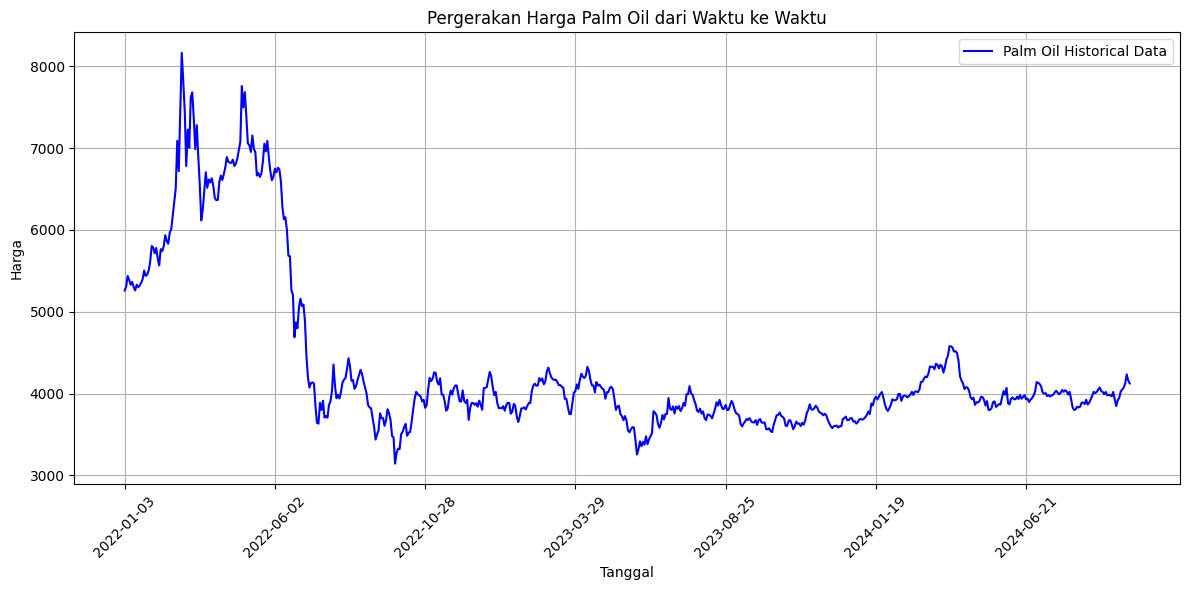

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(palmoil_df['Date'], palmoil_df['Price_temp'], linestyle='-', color='blue', label='Palm Oil Historical Data')

plt.title('Pergerakan Harga Palm Oil dari Waktu ke Waktu')
plt.xlabel('Tanggal')
plt.ylabel('Harga')
plt.grid(True)
plt.legend()

step = 100
plt.xticks(ticks=range(0, len(palmoil_df['Date']), step),
           labels=palmoil_df['Date'][::step], rotation=45)

plt.tight_layout()
plt.show()

Grafik di atas menunjukkan tren fluktuasi harga palm oil. Data dalam grafik diurutkan berdasarkan tanggal.
Pada Q1-Q2 tahun 2022, harga palm oil menunjukkan tren peningkatan. Harga palm oil pada Q3 harga palm oil mengalami penurunan signifikan. Tren ini berlanjut hingga Q3 tahun 2024 dengan fluktuasi harga yang cenderung stagnan.

## Data Preparation

Konversi data dari tipe object ke integer dan datetime

In [32]:
kolom_int = ['Price', 'Open', 'High', 'Low', 'Change %']
kolom_tanggal = 'Date'

for col in kolom_int:
    palmoil_df[col] = (
        palmoil_df[col]
        .replace(',', '', regex=True)
        .astype(str).str.strip()
    )
    palmoil_df[col] = pd.to_numeric(palmoil_df[col], errors='coerce').fillna(0).astype(int)

palmoil_df[kolom_tanggal] = pd.to_datetime(palmoil_df[kolom_tanggal], errors='coerce')

Konversi tipe data untuk Vol. dan sesuaikan satuannya

In [33]:
def parse_volume(val):
    if isinstance(val, str):
        val = val.replace(',', '').strip().upper()
        if 'K' in val:
            try:
                return int(float(val.replace('K', '')) * 1000)
            except:
                return None
        elif val.replace('.', '', 1).isdigit():
            return int(float(val))
    return None  # Untuk N/A atau None

palmoil_df['Vol.'] = palmoil_df['Vol.'].apply(parse_volume)

Mengisi missing values di kolom Vol. dengan nilai median dari Vol.

In [34]:
median_value = palmoil_df['Vol.'].median()
palmoil_df['Vol.'] = palmoil_df['Vol.'].fillna(median_value)

palmoil_df.isna().sum()

,0
Date,0
Price,0
Open,0
High,0
Low,0
Vol.,0
Change %,0
Price_temp,0


Sudah tidak ada missing values di kolom Vol.

Menghapus Price_temp yang sebelumnya digunakan untuk membuat grafik tren

In [36]:
palmoil_df.drop(columns=['Price_temp'], inplace=True)

Melihat distribusi data

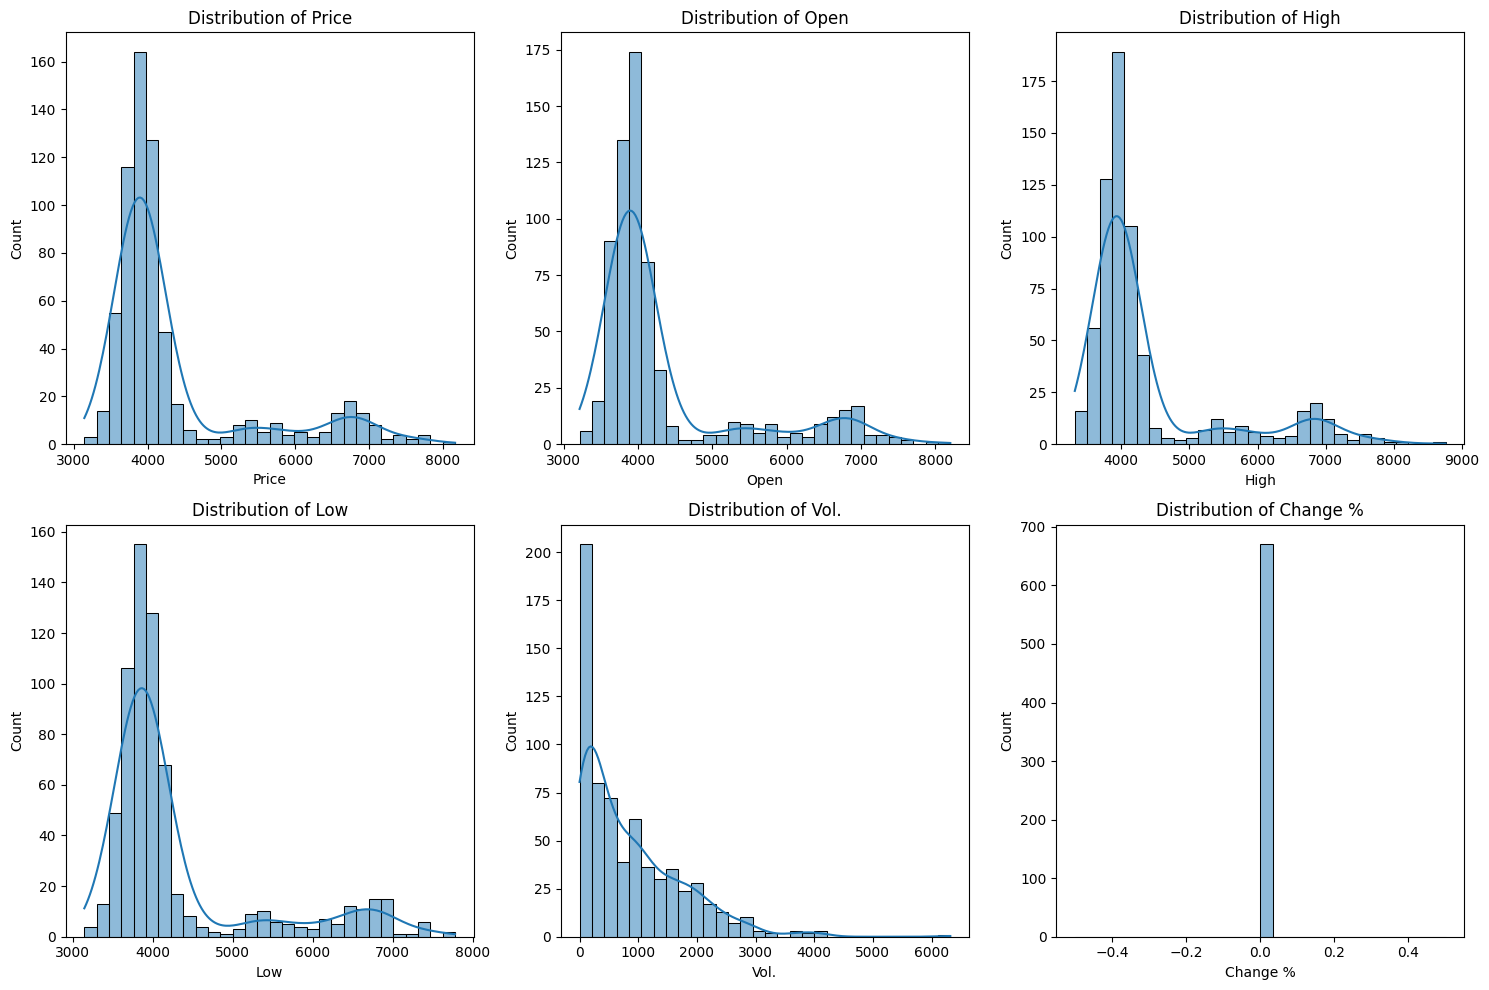

In [38]:
numeric_columns = palmoil_df.select_dtypes(include='number').columns

plt.figure(figsize=(15, 10))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(palmoil_df[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')

plt.tight_layout()
plt.show()

Distribusi nilai untuk variabel Price, Open, High, dan Low cenderung normal, sementara variabel Vol. memiliki distribusi skewed ke kanan dengan dominasi nilai di bawah 1000.

Standarisasi dengan Standar Scaler perlu dilakukan  karena adanya perbedaan skala dalam data.

In [39]:
numeric_features = palmoil_df.select_dtypes(include=['number']).columns
numeric_features

scaler = StandardScaler()
palmoil_df[numeric_features] = scaler.fit_transform(palmoil_df[numeric_features])

Pembagian data dilakukan dengan rasio 8:2

In [40]:
X = palmoil_df.drop(columns=['Price', 'Date'])
y = palmoil_df['Price']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print("Jumlah data: ",len(X))
print("Jumlah data latih: ",len(x_train))
print("Jumlah data test: ",len(x_test))

Jumlah data:  670
Jumlah data latih:  536
Jumlah data test:  134


## Modelling

### Linear Regression

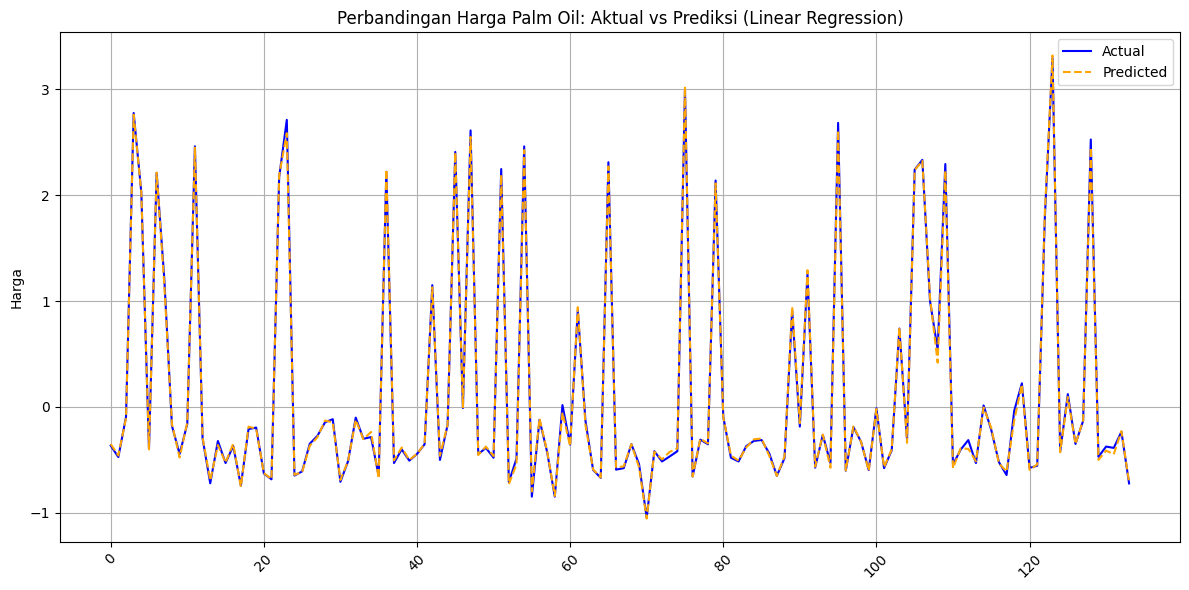

In [42]:
lr = LinearRegression()
lr.fit(x_train, y_train)

y_pred = lr.predict(x_test)

comparison = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
}).reset_index(drop=True)

plt.figure(figsize=(12, 6))
plt.plot(comparison['Actual'], label='Actual', color='blue', linestyle='-')
plt.plot(comparison['Predicted'], label='Predicted', color='orange', linestyle='--')
plt.title('Perbandingan Harga Palm Oil: Aktual vs Prediksi (Linear Regression)')
plt.ylabel('Harga')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### Random Forest Regression

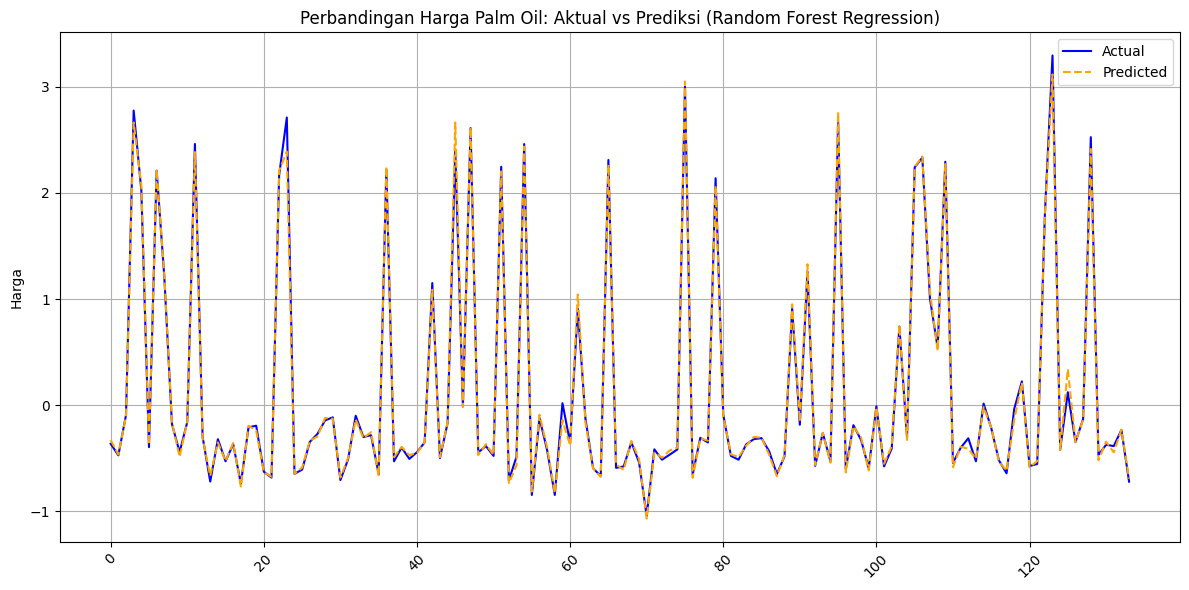

In [44]:
rf = RandomForestRegressor(random_state=42)
rf.fit(x_train, y_train)

y_pred = rf.predict(x_test)

comparison = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
}).reset_index(drop=True)

plt.figure(figsize=(12, 6))
plt.plot(comparison['Actual'], label='Actual', color='blue', linestyle='-')
plt.plot(comparison['Predicted'], label='Predicted', color='orange', linestyle='--')
plt.title('Perbandingan Harga Palm Oil: Aktual vs Prediksi (Random Forest Regression)')
plt.ylabel('Harga')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### SVR

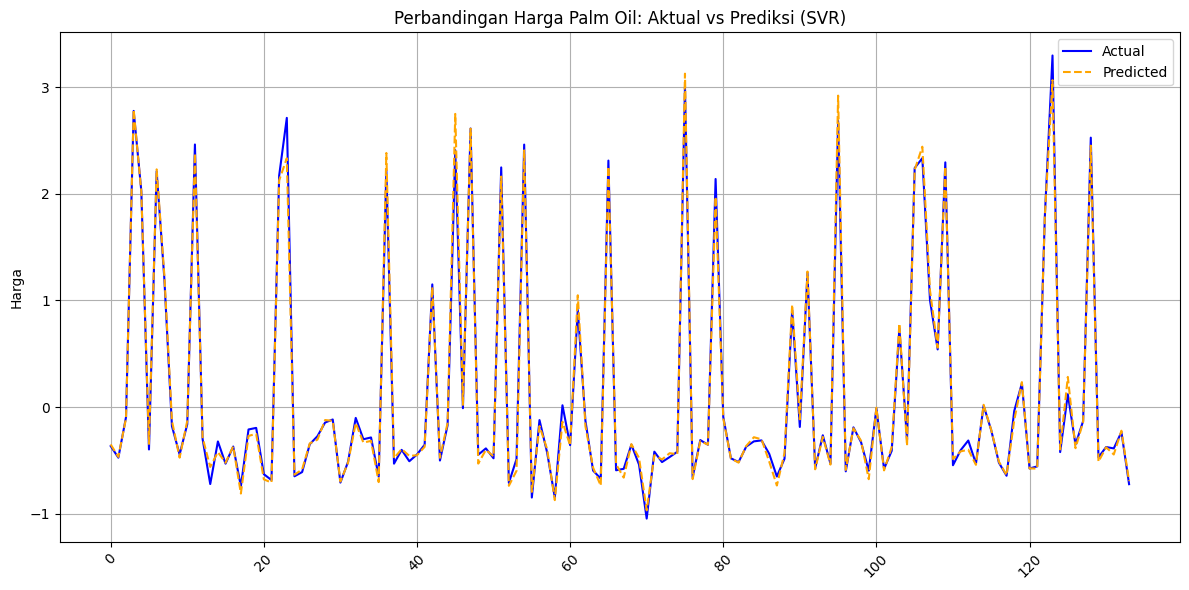

In [45]:
svr = SVR()
svr.fit(x_train, y_train)

y_pred = svr.predict(x_test)

comparison = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred
}).reset_index(drop=True)

plt.figure(figsize=(12, 6))
plt.plot(comparison['Actual'], label='Actual', color='blue', linestyle='-')
plt.plot(comparison['Predicted'], label='Predicted', color='orange', linestyle='--')
plt.title('Perbandingan Harga Palm Oil: Aktual vs Prediksi (SVR)')
plt.ylabel('Harga')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

## Evaluasi

Metrik evaluasi yang digunakan dalam regresi dengan ketiga model di atas adalah MAE, RMSE, dan R-squared.

In [46]:
def evaluate_model(name, model, x_test, y_test):
    y_pred = model.predict(x_test)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"{name}")
    print(f"MAE  : {mae:.4f}")
    print(f"RMSE : {rmse:.4f}")
    print(f"R²   : {r2:.4f}")

evaluate_model("Linear Regression", lr, x_test, y_test)
evaluate_model("Random Forest", rf, x_test, y_test)
evaluate_model("SVR", svr, x_test, y_test)

Linear Regression
MAE  : 0.0222
RMSE : 0.0314
R²   : 0.9991
Random Forest
MAE  : 0.0345
RMSE : 0.0575
R²   : 0.9971
SVR
MAE  : 0.0473
RMSE : 0.0753
R²   : 0.9951


Berdasarkan metrik evaluasi yang ada, model linear regression adalah model terbaik untuk prediksi harga palm oil.

Melihat korfisien dari model Linear Regression

In [47]:
coef_df = pd.DataFrame({
    'Fitur': x_train.columns,
    'Koefisien': lr.coef_
})
coef_df = coef_df.sort_values(by='Koefisien', ascending=False)

print(coef_df)

      Fitur  Koefisien
2       Low   0.915395
1      High   0.753757
3      Vol.   0.000592
4  Change %   0.000000
0      Open  -0.671897


Diketatui terdapat korelasi positif antara fitur Low, High, dan Vol. terhadap harga palm oil. Terdapat korelasi negatif dari fitur Open terhadap harga palm oil. Tidak ada korelasi antara fitur Change % terhadap perubahan harga palm oil.